In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from scipy.stats import boxcox
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import set_config
set_config(transform_output = "pandas")
from sklearn.preprocessing import PowerTransformer

In [4]:
data= pd.read_csv('/Users/sarahberkin/Berkin-Data Science Capstone/diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data[data.Outcome == '1'].T

""
Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [11]:
missing_counts = data.isnull().sum()
missing_percentages = 100 * data.isnull().mean()
missing = pd.concat([missing_counts, missing_percentages], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'])

,count,%
Pregnancies,0,0.0
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0
Outcome,0,0.0


In [13]:
averages_by_outcome = data.groupby('Outcome')[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].mean()
averages_by_outcome.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


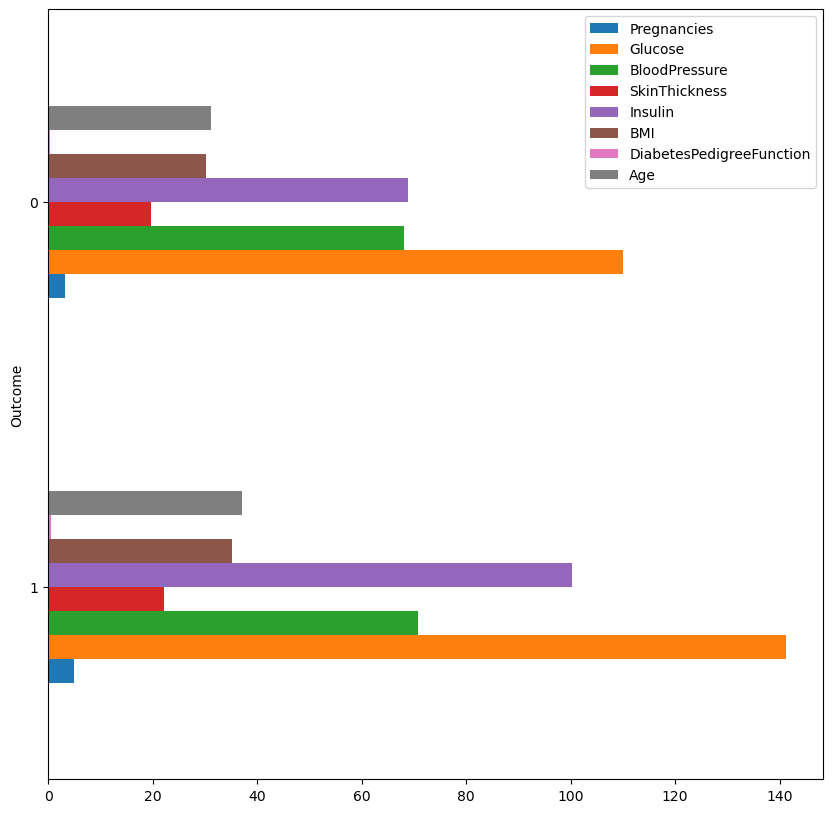

In [15]:
(averages_by_outcome.reindex(index=averages_by_outcome.mean(axis=1).sort_values(ascending=False).index).plot(kind='barh', figsize=(10,10)))
plt.show()

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


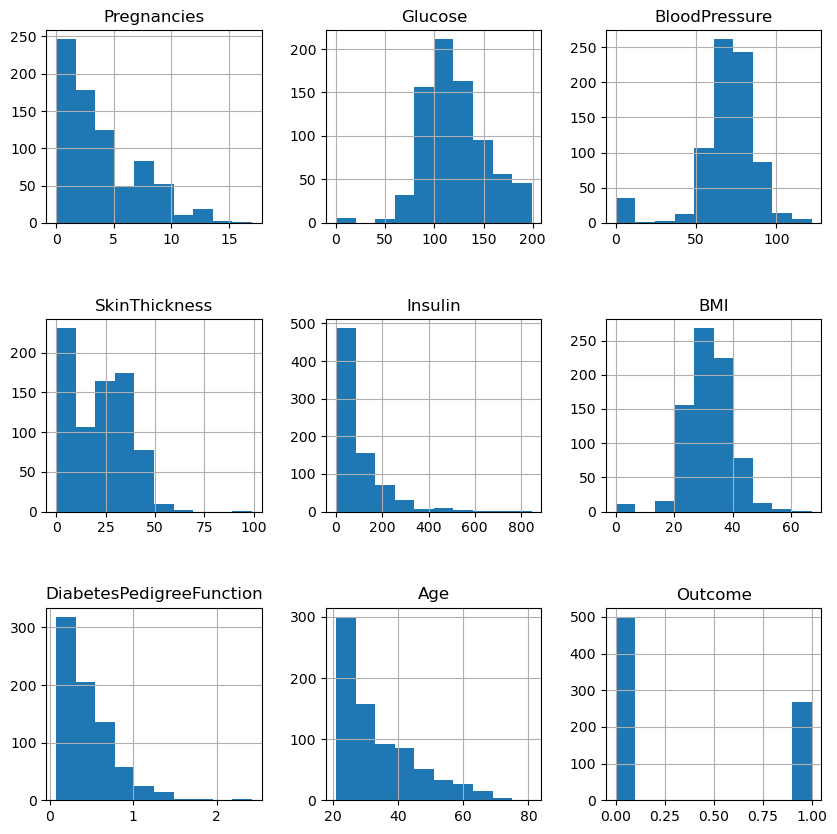

In [19]:
data.hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.5);

In [21]:
data[data.Glucose < 40].T

,75,182,342,349,502
Pregnancies,1.00,1.000,1.000,5.000,6.000
Glucose,0.00,0.000,0.000,0.000,0.000
BloodPressure,48.00,74.000,68.000,80.000,68.000
SkinThickness,20.00,20.000,35.000,32.000,41.000
Insulin,0.00,23.000,0.000,0.000,0.000
BMI,24.70,27.700,32.000,41.000,39.000
DiabetesPedigreeFunction,0.14,0.299,0.389,0.346,0.727
Age,22.00,21.000,22.000,37.000,41.000
Outcome,0.00,0.000,0.000,1.000,1.000


In [23]:
data[data.BMI < 10].T

,9,49,60,81,145,371,426,494,522,684,706
Pregnancies,8.000,7.000,2.000,2.000,0.000,0.000,0.000,3.000,6.000,5.00,10.000
Glucose,125.000,105.000,84.000,74.000,102.000,118.000,94.000,80.000,114.000,136.00,115.000
BloodPressure,96.000,0.000,0.000,0.000,75.000,64.000,0.000,0.000,0.000,82.00,0.000
SkinThickness,0.000,0.000,0.000,0.000,23.000,23.000,0.000,0.000,0.000,0.00,0.000
Insulin,0.000,0.000,0.000,0.000,0.000,89.000,0.000,0.000,0.000,0.00,0.000
BMI,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000
DiabetesPedigreeFunction,0.232,0.305,0.304,0.102,0.572,1.731,0.256,0.174,0.189,0.64,0.261
Age,54.000,24.000,21.000,22.000,21.000,21.000,25.000,22.000,26.000,69.00,30.000
Outcome,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,1.000


In [25]:
data[data.BloodPressure < 60].T

,4,6,7,15,18,32,46,49,51,55,...,703,706,707,713,715,729,733,741,742,760
Pregnancies,0.000,3.000,10.000,7.000,1.000,3.000,1.000,7.000,1.000,1.000,...,2.000,10.000,2.000,0.000,7.000,2.000,2.000,3.0,1.000,2.000
Glucose,137.000,78.000,115.000,100.000,103.000,88.000,146.000,105.000,101.000,73.000,...,129.000,115.000,127.000,134.000,187.000,92.000,106.000,102.0,109.000,88.000
BloodPressure,40.000,50.000,0.000,0.000,30.000,58.000,56.000,0.000,50.000,50.000,...,0.000,0.000,46.000,58.000,50.000,52.000,56.000,44.0,58.000,58.000
SkinThickness,35.000,32.000,0.000,0.000,38.000,11.000,0.000,0.000,15.000,10.000,...,0.000,0.000,21.000,20.000,33.000,0.000,27.000,20.0,18.000,26.000
Insulin,168.000,88.000,0.000,0.000,83.000,54.000,0.000,0.000,36.000,0.000,...,0.000,0.000,335.000,291.000,392.000,0.000,165.000,94.0,116.000,16.000
BMI,43.100,31.000,35.300,30.000,43.300,24.800,29.700,0.000,24.200,23.000,...,38.500,0.000,34.400,26.400,33.900,30.100,29.000,30.8,28.500,28.400
DiabetesPedigreeFunction,2.288,0.248,0.134,0.484,0.183,0.267,0.564,0.305,0.526,0.248,...,0.304,0.261,0.176,0.352,0.826,0.141,0.426,0.4,0.219,0.766
Age,33.000,26.000,29.000,32.000,33.000,22.000,29.000,24.000,26.000,21.000,...,41.000,30.000,22.000,21.000,34.000,22.000,22.000,26.0,22.000,22.000
Outcome,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.0,0.000,0.000


In [27]:
data[data.Insulin < 10].T

,0,1,2,5,7,9,10,11,12,15,...,754,756,757,758,759,761,762,764,766,767
Pregnancies,6.000,1.000,8.000,5.000,10.000,8.000,4.000,10.000,10.000,7.000,...,8.000,7.000,0.000,1.000,6.000,9.000,9.000,2.00,1.000,1.000
Glucose,148.000,85.000,183.000,116.000,115.000,125.000,110.000,168.000,139.000,100.000,...,154.000,137.000,123.000,106.000,190.000,170.000,89.000,122.00,126.000,93.000
BloodPressure,72.000,66.000,64.000,74.000,0.000,96.000,92.000,74.000,80.000,0.000,...,78.000,90.000,72.000,76.000,92.000,74.000,62.000,70.00,60.000,70.000
SkinThickness,35.000,29.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,32.000,41.000,0.000,0.000,0.000,31.000,0.000,27.00,0.000,31.000
Insulin,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000
BMI,33.600,26.600,23.300,25.600,35.300,0.000,37.600,38.000,27.100,30.000,...,32.400,32.000,36.300,37.500,35.500,44.000,22.500,36.80,30.100,30.400
DiabetesPedigreeFunction,0.627,0.351,0.672,0.201,0.134,0.232,0.191,0.537,1.441,0.484,...,0.443,0.391,0.258,0.197,0.278,0.403,0.142,0.34,0.349,0.315
Age,50.000,31.000,32.000,30.000,29.000,54.000,30.000,34.000,57.000,32.000,...,45.000,39.000,52.000,26.000,66.000,43.000,33.000,27.00,47.000,23.000
Outcome,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,...,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.00,1.000,0.000


In [29]:
data_0s = data.copy(deep=True)
data_0s[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data_0s[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
print(data_0s.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [31]:
data_0s['Glucose'] = data_0s['Glucose'].fillna(data_0s['Glucose'].mean())
data_0s['BloodPressure'] = data_0s['BloodPressure'].fillna(data_0s['BloodPressure'].mean())
data_0s['SkinThickness'] = data_0s['SkinThickness'].fillna(data_0s['SkinThickness'].median())
data_0s['Insulin'] = data_0s['Insulin'].fillna(data_0s['Insulin'].median())
data_0s['BMI'] = data_0s['BMI'].fillna(data_0s['BMI'].mean())

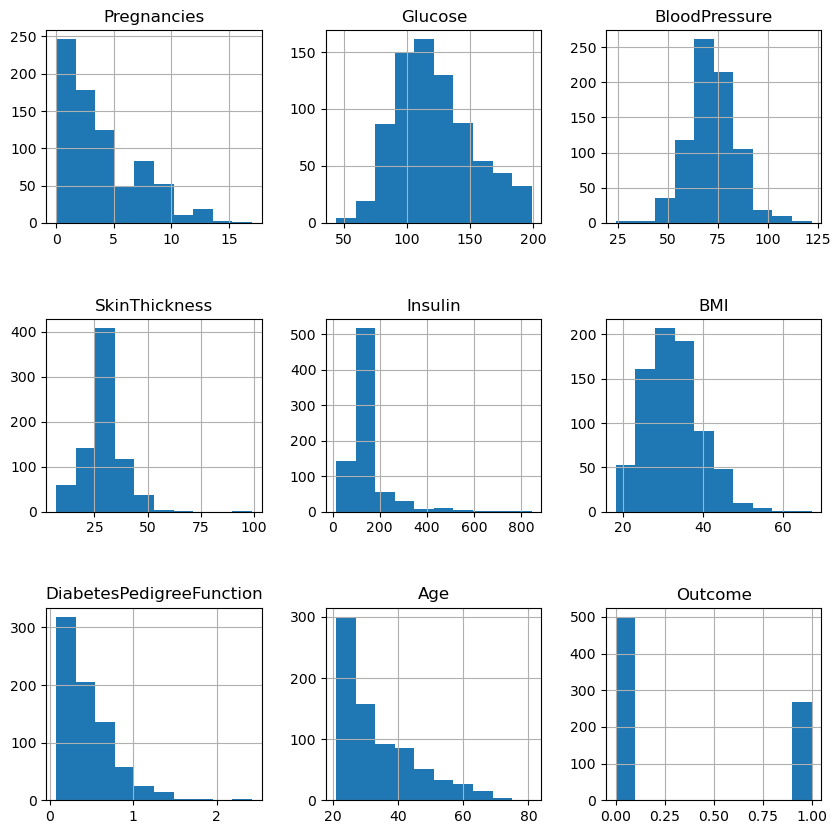

In [33]:
data_0s.hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.5);

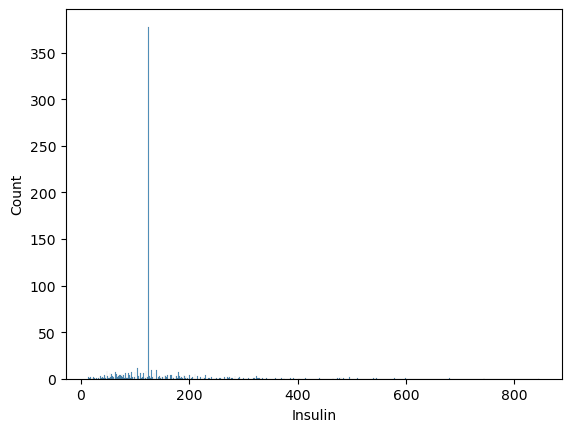

In [35]:
sns.histplot(data_0s['Insulin'])
plt.show()

In [37]:
df = data_0s

In [39]:
print(df.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [41]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [43]:
df = df[df['Insulin'] < 125]

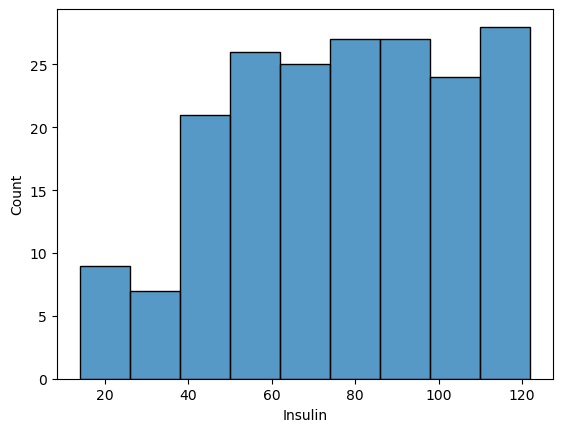

In [45]:
sns.histplot(df['Insulin'])
plt.show()

In [47]:
df = df[df['SkinThickness'] < 70]

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,194.0,2.860825,3.044780,0.000,1.000,2.0000,4.00000,17.00
Glucose,194.0,104.982921,23.112071,56.000,88.250,100.0000,118.00000,180.00
BloodPressure,194.0,68.819588,12.454411,24.000,62.000,70.0000,76.00000,106.00
SkinThickness,194.0,26.891753,10.615446,10.000,18.000,26.0000,33.00000,63.00
Insulin,194.0,76.268041,27.438680,14.000,55.000,76.0000,100.00000,122.00
BMI,194.0,31.324008,7.047918,18.200,26.125,30.6500,35.45000,59.40
DiabetesPedigreeFunction,194.0,0.487809,0.327109,0.089,0.264,0.4095,0.63925,2.42
Age,194.0,28.118557,8.355530,21.000,22.000,25.0000,30.75000,81.00
Outcome,194.0,0.149485,0.357488,0.000,0.000,0.0000,0.00000,1.00


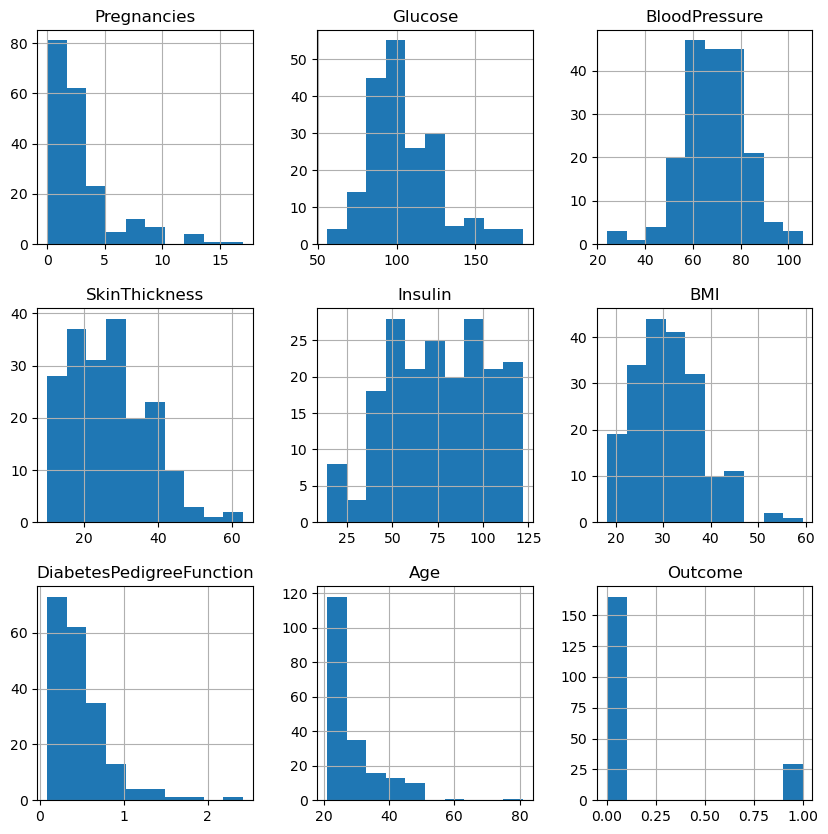

In [51]:
hist = df.hist(bins=10, figsize=(10,10))

In [53]:
print(df.dtypes)

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


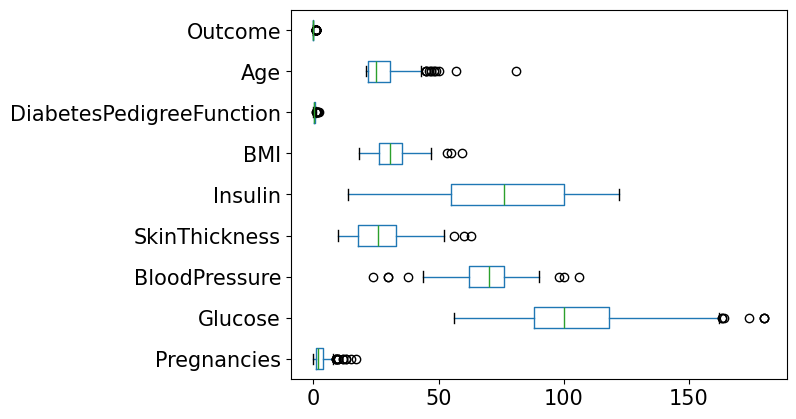

In [55]:
boxplot = df.boxplot(grid=False, vert=False, fontsize=15)

In [57]:
df = df[df['BloodPressure'] > 45]
df = df[df['Glucose'] < 160]
df = df[df['SkinThickness'] < 55]
df = df[df['BloodPressure'] < 90]
df = df[df['Age'] < 50]

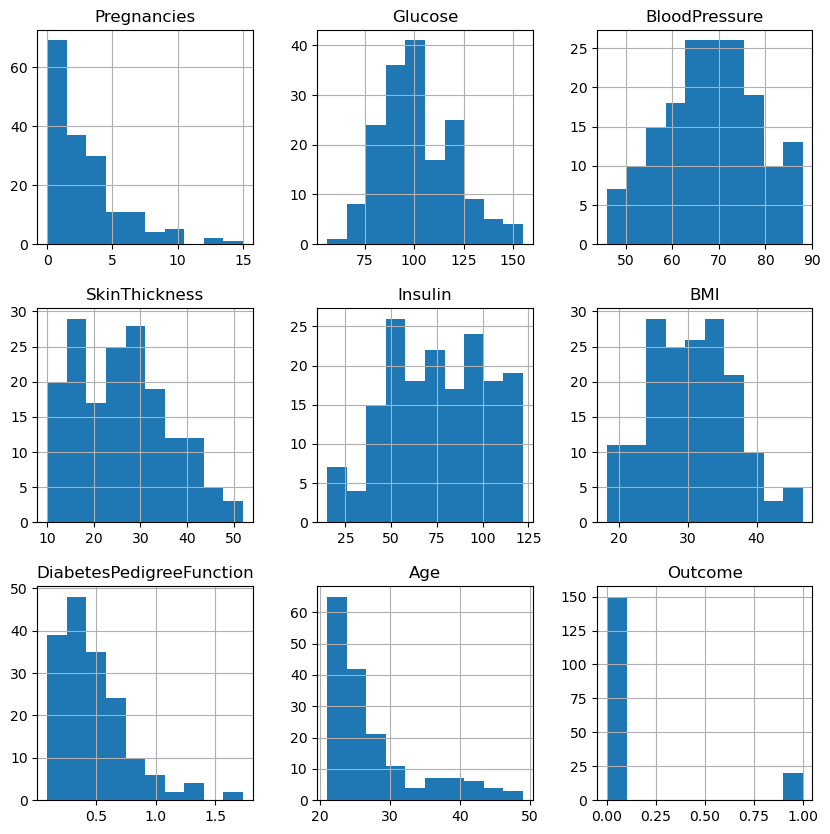

In [59]:
hist1 = df.hist(bins=10, figsize=(10,10))

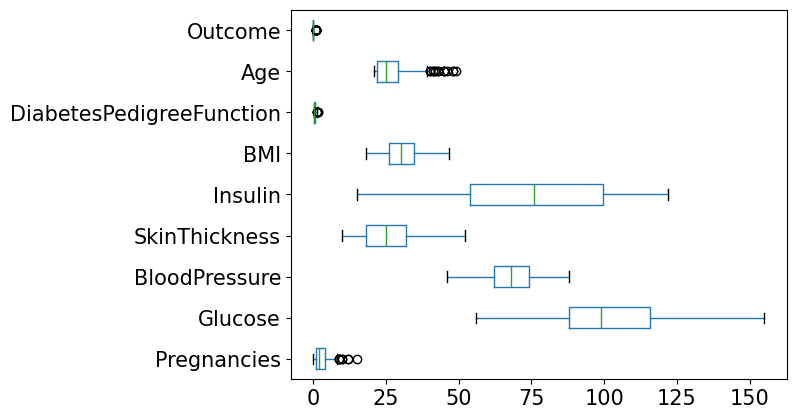

In [61]:
boxplot = df.boxplot(grid=False, vert=False, fontsize=15)

I'm choosing to leave in the outliers on pregnancy. I believe that those are legit occurances even though they're outside the norm. Also, I don't want to miss info on gestational diabetes.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'Pregnancies'),
  Text(0, 1.5, 'Glucose'),
  Text(0, 2.5, 'BloodPressure'),
  Text(0, 3.5, 'SkinThickness'),
  Text(0, 4.5, 'Insulin'),
  Text(0, 5.5, 'BMI'),
  Text(0, 6.5, 'DiabetesPedigreeFunction'),
  Text(0, 7.5, 'Age'),
  Text(0, 8.5, 'Outcome')])

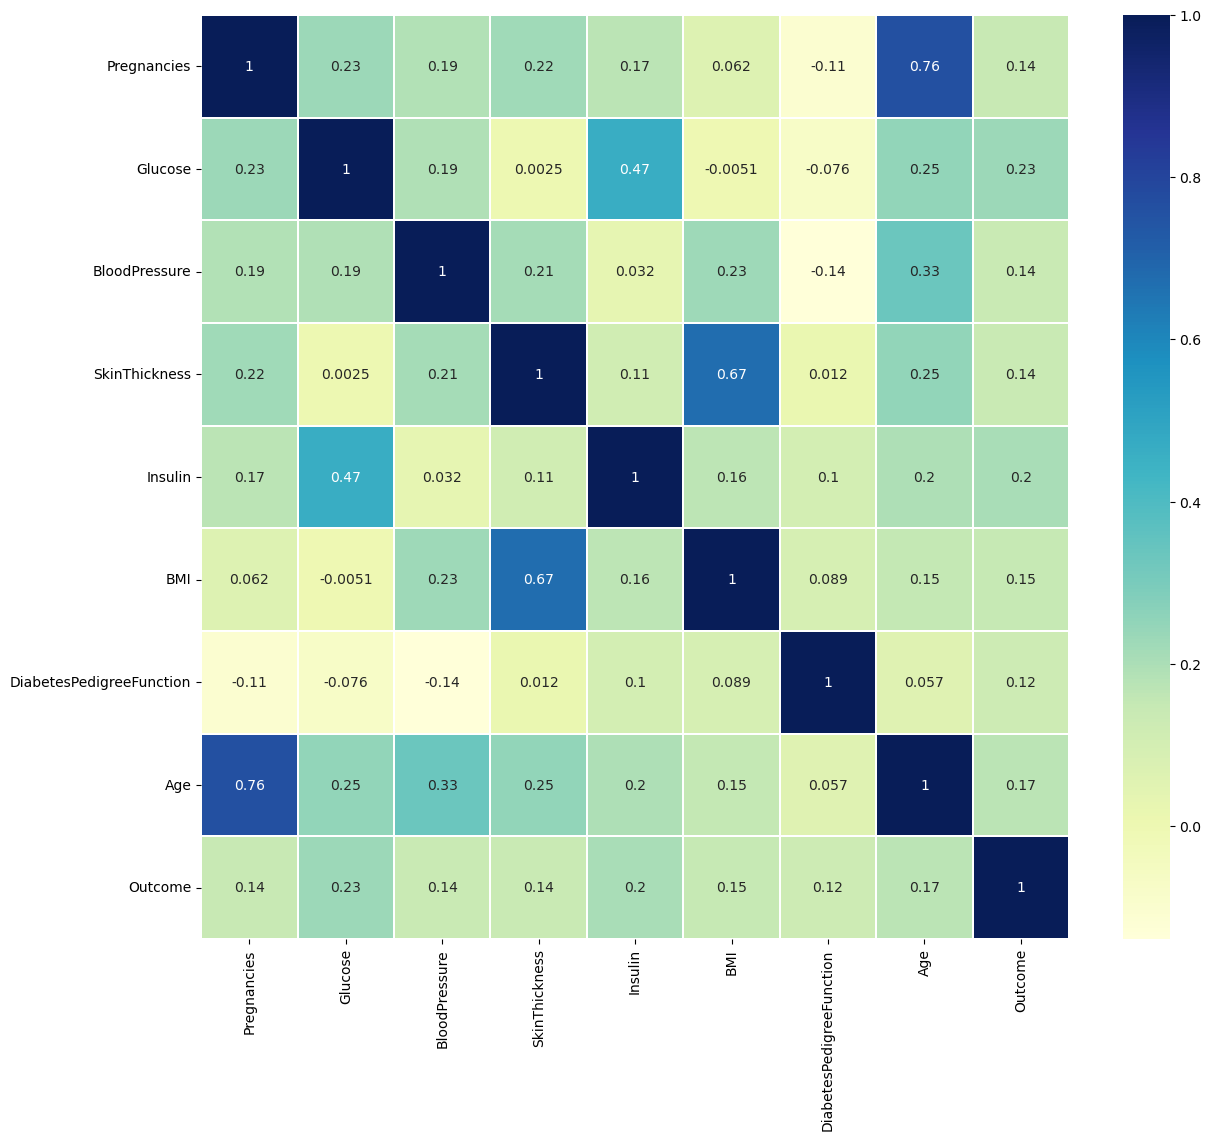

In [63]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

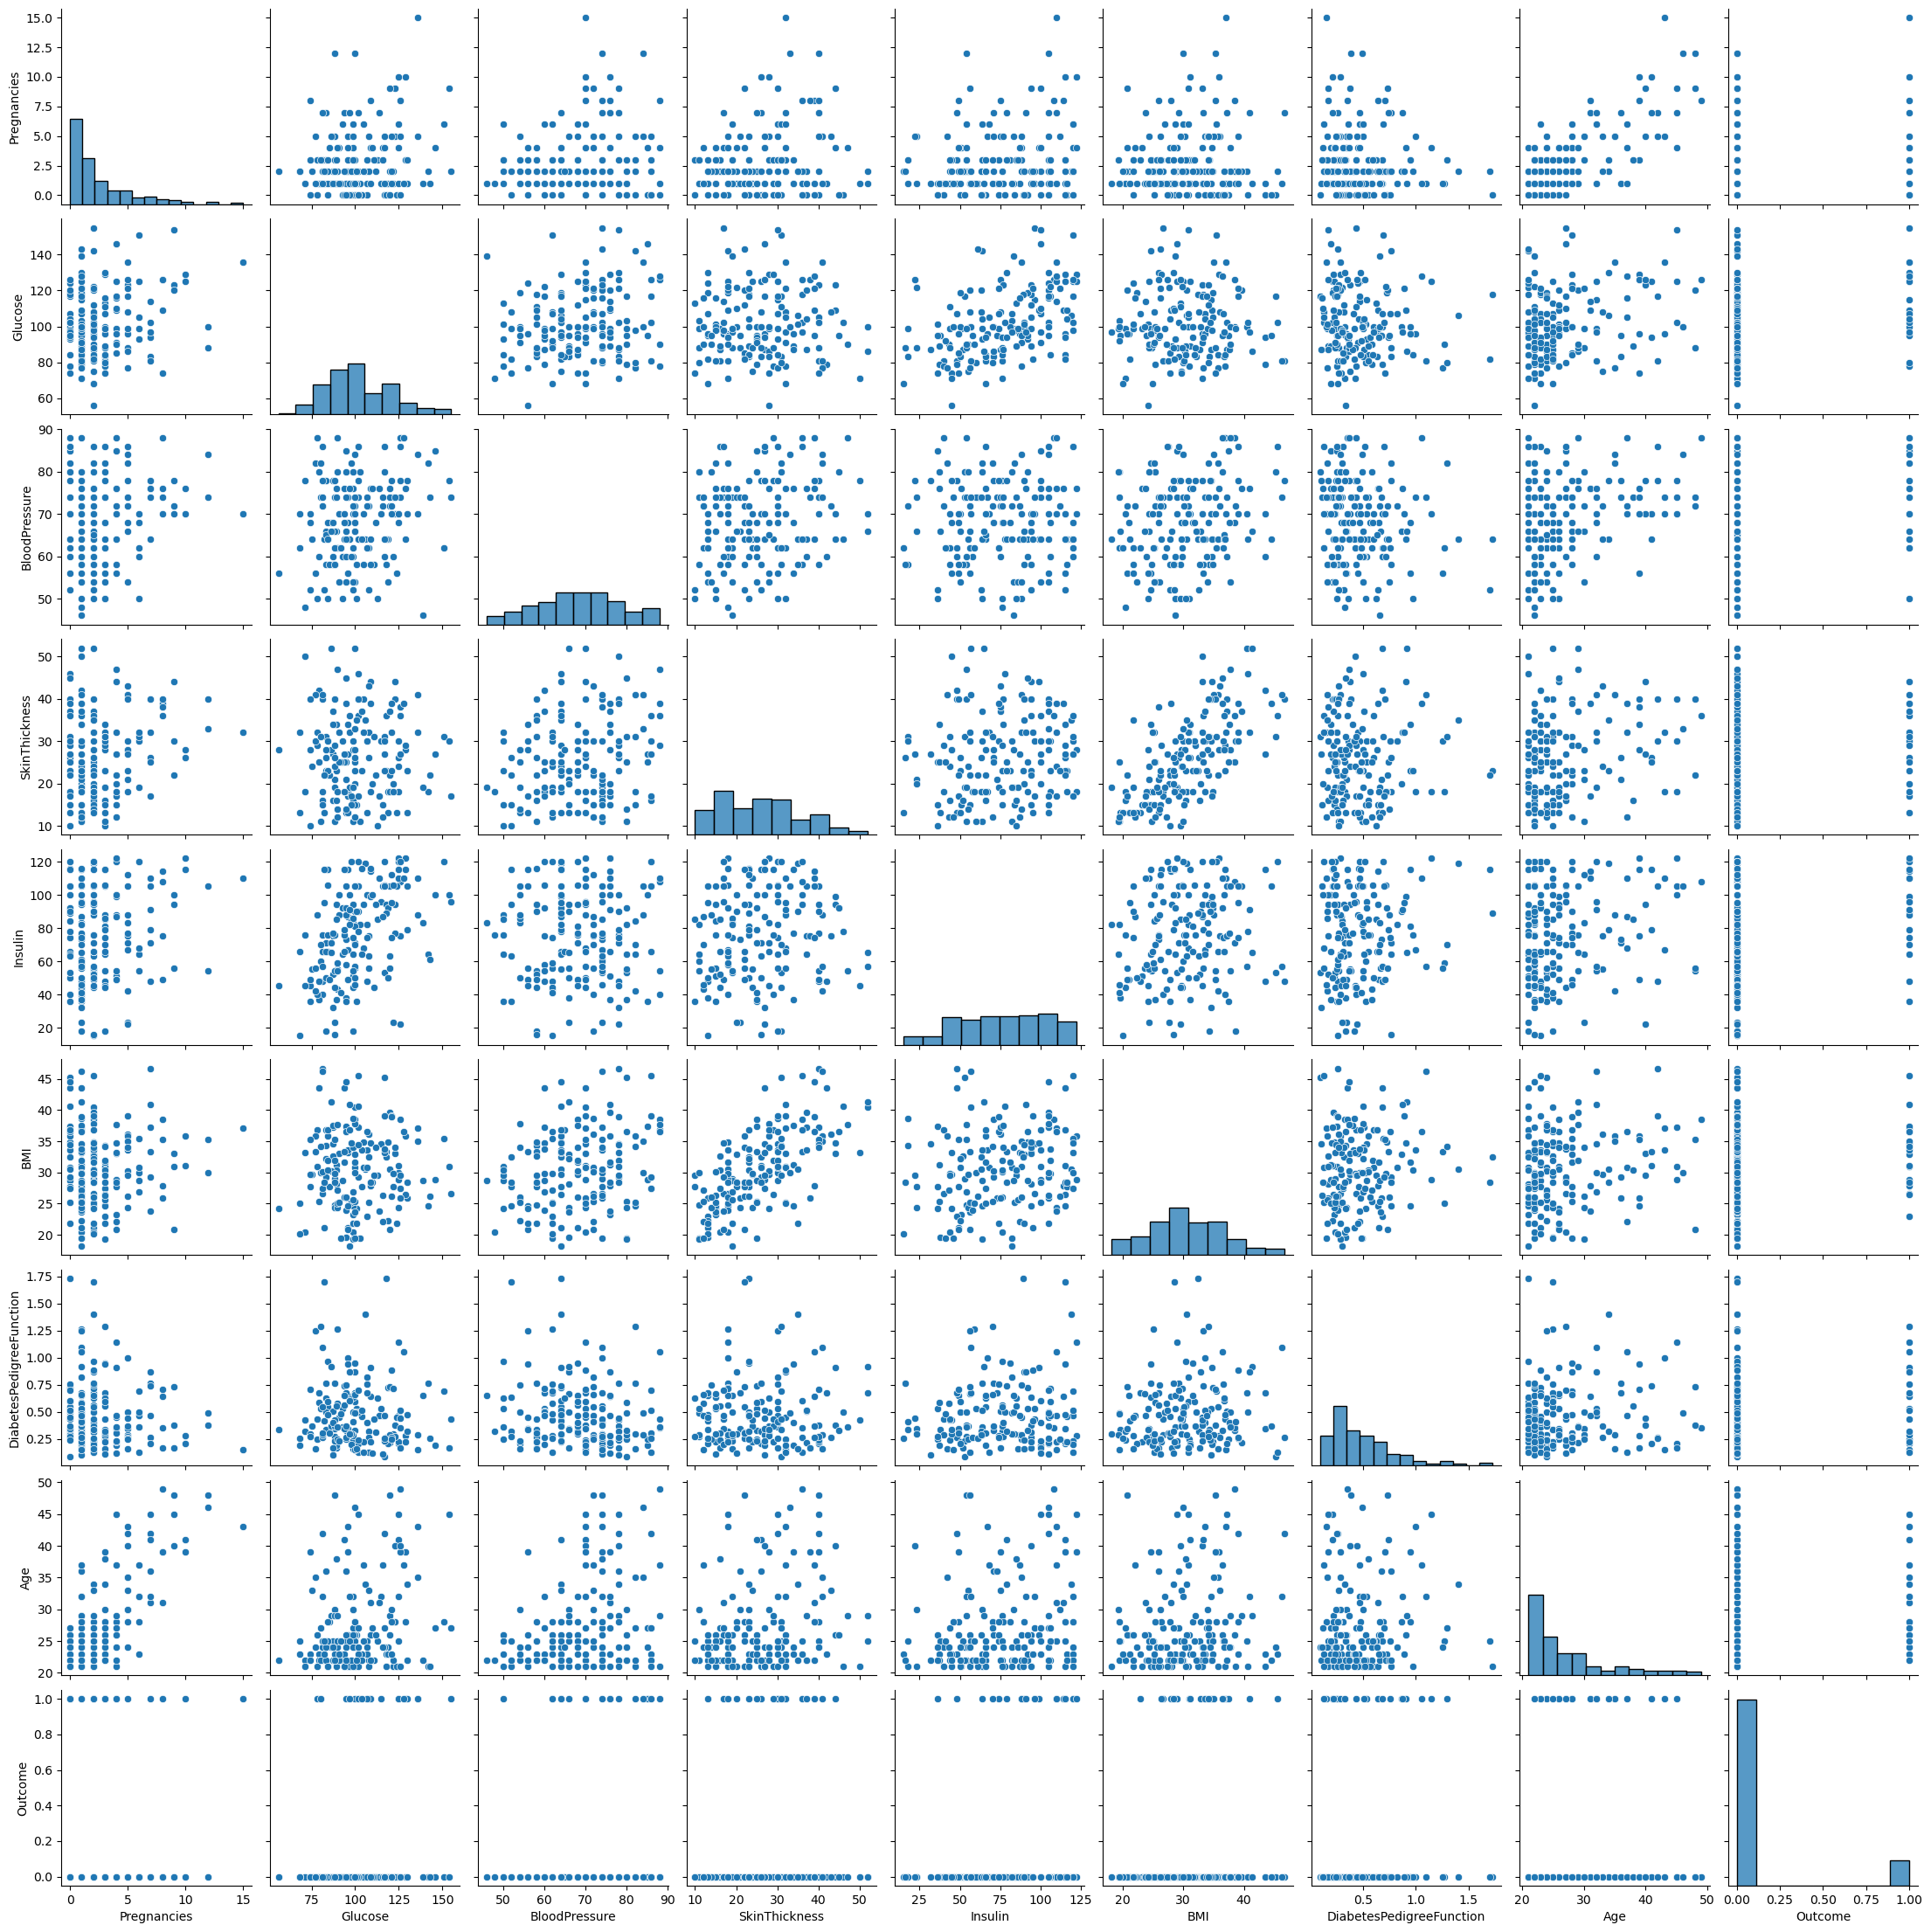

In [65]:
g = sns.pairplot(df)

These results are very interesting! I can get a quick glance of what level diabetes-positive people were at for each variable 

In [67]:
from scipy.stats import pearsonr

list_all_ind = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
list_outcome = df["Outcome"]
list_preg = df["Pregnancies"]
list_gluc = df["Glucose"]
list_bp = df["BloodPressure"]
list_skinthk = df["SkinThickness"]
list_insu = df["Insulin"]
list_bmi = df["BMI"]
list_diapedfunc = df["DiabetesPedigreeFunction"]
list_age = df["Age"]

In [69]:
corr_pregnancies = pearsonr(list_preg, list_outcome)
print(corr_pregnancies)

PearsonRResult(statistic=0.14405163736190504, pvalue=0.060912083740702935)


In [71]:
corr_glucose = pearsonr(list_gluc, list_outcome)
print(corr_glucose)

PearsonRResult(statistic=0.23416325004247598, pvalue=0.002116090405336514)


In [73]:
corr_bloodpressure = pearsonr(list_bp, list_outcome)
print(corr_bloodpressure)

PearsonRResult(statistic=0.1408849975279716, pvalue=0.06687489432034688)


In [75]:
corr_skinthickness = pearsonr(list_skinthk, list_outcome)
print(corr_skinthickness)

PearsonRResult(statistic=0.13888969770307608, pvalue=0.07087082262161196)


In [77]:
corr_insulin = pearsonr(list_insu, list_outcome)
print(corr_insulin)

PearsonRResult(statistic=0.2042761957857276, pvalue=0.007539590419075425)


In [79]:
corr_bmi = pearsonr(list_bmi, list_outcome)
print(corr_bmi)

PearsonRResult(statistic=0.1484872188601701, pvalue=0.05330039210472585)


In [81]:
corr_diabetes_pedigree = pearsonr(list_diapedfunc, list_outcome)
print(corr_diabetes_pedigree)

PearsonRResult(statistic=0.12485046857352694, pvalue=0.10476172810767101)


In [83]:
corr_age = pearsonr(list_age, list_outcome)
print(corr_age)

PearsonRResult(statistic=0.1694325731971604, pvalue=0.027186692522374555)


The 3 independent variables that show to have statistically signifficant results based on a 0.05 p-value, ranked from most to least significant, are 1) Glucose, 2) Insulin, 3) BMI

These are worth taking a deeper dive on

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [87]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
19,1,115.0,70.0,30.0,96.0,34.6,0.529,32,1
25,10,125.0,70.0,26.0,115.0,31.1,0.205,41,1
32,3,88.0,58.0,11.0,54.0,24.8,0.267,22,0


In [89]:
X, y = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]], df["Outcome"]
y_binary = (y > np.median(y)).astype(int)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

In [93]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

***I have scaled all the independent variables, as they were numeric. Had any of them been categorical, I would have created dummy variables on those. The dependent variable was binary, so no need to scale it, I just adjusted the type to integer. 

***Because my dependent variable is a binary Yes/No about diabetes diagnosis, I will do the 2 types of modeling recommended for this case-- Logistic regression and Support Vector Machine algorithms.

In [95]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [97]:
y_pred = logmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 91.18%


***I tried out one example of logistic regression on it's own above & below tried it with hyperparameter tuning.

In [171]:
c_param_logreg_range = [0.001, 0.01, 0.1, 1, 10, 100]

table = pd.DataFrame(columns = ['c_param_logreg_range', 'accuracy'])
table['c_param_logreg_range'] = c_param_logreg_range

j=0
for i in c_param_logreg_range:
    logreg = LogisticRegression(penalty = 'l2', C = i, random_state = 123)
    logreg.fit(X_train, y_train)
    y_pred_lr = logreg.predict(X_test)
    table .iloc[j,1] = accuracy_score(y_test, y_pred_lr)
    j += 1

table

,c_param_logreg_range,accuracy
0,0.001,0.941176
1,0.010,0.941176
2,0.100,0.941176
3,1.000,0.911765
4,10.000,0.911765
5,100.000,0.911765


In [173]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
Accuracy_score_lr = logreg.score(X_test, y_test)
print("Accuracy Score", Accuracy_score_lr)

Confusion Matrix:
 [[31  1]
 [ 2  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.00      0.00      0.00         2

    accuracy                           0.91        34
   macro avg       0.47      0.48      0.48        34
weighted avg       0.88      0.91      0.90        34

Accuracy Score 0.9117647058823529


In [175]:
from sklearn.model_selection import cross_val_score

cv_scores_test = cross_val_score(logreg, X_test, y_test, cv=2, scoring='roc_auc')
cv_scores_train = cross_val_score(logreg, X_train, y_train, cv=2, scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test = cv_scores_test.mean()
cv_scores_lr_train = cv_scores_train.mean()
cv_scores_std_test_lr = cv_scores_test.std()
print('Mean cross validation test score: ' +str(cv_scores_lr_test))
print('Mean cross validation train score: ' +str(cv_scores_lr_train))
print('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.625 0.375]
Mean cross validation test score: 0.5
Mean cross validation train score: 0.6581920903954802
Standard deviation in cv test scores: 0.125


In [177]:
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

svm = SVC(kernel='rbf', gamma=0.5, C=1)
svm.fit(X_train, y_train)

y_predict_svm = svm.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_predict_svm)
print(cnf_matrix)

Accuracy_svm = svm.score(X_test, y_test)
print("Accuracy: ", Accuracy_svm)

[[32  0]
 [ 2  0]]
Accuracy:  0.9411764705882353


In [179]:
from sklearn.model_selection import cross_val_score

cv_scores_test = cross_val_score(svm, X_test, y_test, cv=2, scoring='roc_auc')
cv_scores_train = cross_val_score(svm, X_train, y_train, cv=2, scoring='roc_auc')
print(cv_scores_test)
cv_scores_svm_test = cv_scores_test.mean()
cv_scores_svm_train = cv_scores_train.mean()
cv_scores_std_svm = np.std(cv_scores_test)
print('Mean cross validation test score: ' +str(cv_scores_svm_test))
print('Mean cross validation train score: ' +str(cv_scores_svm_train))
print('Standard deviation in cv scores: ' +str(cv_scores_std_svm))

[0.25  0.625]
Mean cross validation test score: 0.4375
Mean cross validation train score: 0.4868173258003766
Standard deviation in cv scores: 0.1875


*** Now I'll compare the models:

In [181]:
mylabels = ['Logistic Regression', 'SVM']
score_test = [cv_scores_lr_test, cv_scores_svm_test]
score_train = [cv_scores_lr_train, cv_scores_svm_train]
Accuracy_score = [Accuracy_score_lr, Accuracy_svm]

score_tab_acc = pd.DataFrame(list(zip(mylabels, Accuracy_score)),
                             columns = ['Algorithm', 'Model accuracy score'])

score_tab = pd.DataFrame(list(zip(mylabels, score_train, score_test)),
                         columns = ['Algorithm', 'ROC-AUC train score', 'ROC-AUC test score'])
print(score_tab_acc)
score_tab

             Algorithm  Model accuracy score
0  Logistic Regression              0.911765
1                  SVM              0.941176


,Algorithm,ROC-AUC train score,ROC-AUC test score
0,Logistic Regression,0.658192,0.5000
1,SVM,0.486817,0.4375


*** Evaluating the above, even though the accuracy score is higher on the SVM model, I would infer that Logistic Regression is the better model because of the higher ROC-AUC score